# Mini Projeto 1 - Perceptron e Redes Neurais

### Alunos: Daniel Vaz Andrade, Luiz Henrique, George Sousa

### Turma 735 - Pi Data Science

Para resolver o primeiro mini projeto, o aluno ou o grupo de alunos (grupo de no máximo 3 pessoas) devem escolher um dos `datasets` indicados no _Drive_ da turma para realizar o projeto. A partir do `dataset` escolhido, desenvolva os itens abaixo:

__A)__ (10 pontos) Desenvolva uma análise exploratória dos dados adequada;

__B)__ (5 pontos) Faça a preparação dos dados para treinar os modelos;

__C)__ (15 pontos) Teste pelo menos 3 modelos de _Machine Learning_ convencional, sendo algumas sugestões como Regressão Logística, Árvore de Decisão, _Random Forest_ entre outros;

__D)__ (30 pontos) Desenvolva uma rede neural _Perceptron_ para fazer a separação entre as classes. O modelo consegue fazer a separação linear dos dados? Avaliar utilizando o PCA caso necessário;

__E)__ (30 pontos) Monte duas redes neurais MLP utilizando combinações de camadas diferentes (teste algumas combinações para chegar em uma melhor performance dos resultados).

__F)__ (10 pontos) Qual dos modelos teve a melhor performance entre os modelos convencionais, _Perceptron_ e MLP? Discuta um pouco a respeito.


__Entrega:__ até o dia 10/06 pelo Class (vou criar uma atividade como projeto para que vocês entreguem por lá)

__Monitoria:__ dia 07/06;

### Escopo do projeto

> Exploração de Dados

> Análise exploratória de dados (EDA)

> Pré-processamento de dados

> Manipulação de dados

> Seleção/Extração de Recursos

> Modelagem Preditiva

> Resultados e Conclusão do Projeto

## Exploração dos dados

### Importando as bibliotecas necessárias

In [1]:
%%time
import session_info

# Bibliotecas básicas de manipulação de dados e plotagem
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

from tqdm import tqdm
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pipeline de transformações com um estimador final
from sklearn.pipeline import Pipeline

# Dividir matrizes ou matrizes em subconjuntos aleatórios
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Uma função para traçar regiões de decisão de classificadores em 1 ou 2 dimensões
from mlxtend.plotting import plot_decision_regions

# Carregando o Perceptron
from sklearn.linear_model import Perceptron

# Perceptron é um algoritmo de classificação que compartilha a mesma implementação subjacente com o SGDClassifier
'''SGDClassifier:
Este estimador implementa modelos lineares regularizados com aducação de gradiente estocástico (SGD): o gradiente 
da perda é estimado cada amostra de cada amostra de cada vez e o modelo é atualizado ao longo do caminho com um
cronograma de força decrescente'''

# Gerar um problema aleatório de classificação de classe N
from sklearn.datasets import make_classification

# Validador cruzado K-Fold estratificado repetido.
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Avalie uma pontuação por validação cruzada.
from sklearn.model_selection import cross_val_score

# Esse módulo fornece uma maneira de usar o sistema operacional
import os

# Este módulo fornece uma interface simples para comprimir e descomprimir arquivos
import gzip

# Um Sequential modelo é apropriado para uma pilha de camadas simples, 
# onde cada camada tem exactamente um tensor de entrada e um tensor de saída
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
print('Bibliotecas de manipulação de dados e plotagem importadas com sucesso')

Bibliotecas de manipulação de dados e plotagem importadas com sucesso
Wall time: 9.5 s


#### Bibliotecas para avaliação de modelos

In [2]:
%%time

from sklearn.model_selection import train_test_split,KFold,cross_validate,cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score
from scikitplot.metrics import plot_roc_curve as auc_roc
print('Bibliotecas para avaliação de modelos importadas com sucesso')

Bibliotecas para avaliação de modelos importadas com sucesso
Wall time: 66 ms


#### Modelos de classificação

In [3]:
%%time

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
print('Modelos de classificação importados com sucesso')

Modelos de classificação importados com sucesso
Wall time: 1.21 s


#### Otimização dos hiperparâmetros

In [4]:
%%time

import optuna
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from optuna.visualization import plot_contour
from optuna.visualization import plot_optimization_history
print('Otimizadores de parâmetros importados com sucesso')

Otimizadores de parâmetros importados com sucesso
Wall time: 714 ms


#### Visualizando as versões das bibliotecas utilizadas com "session_info.show()"

In [5]:
session_info.show()

In [6]:
%%time

# Iterando os dados em uma variável
df_breast = pd.read_csv('breast_cancer.csv')
df_breast.head(3)

target = 'diagnosis'
labels = ['Benign','Malignant']
features = [i for i in df_breast.columns.values if i not in [target]]

Wall time: 15 ms


In [7]:
%%time

#Verificando as variáveis de cada dataset
df_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Apenas a feature "diagnosis" não é numérica e sendo assim, vamos visualizar quais valores ela possui. 

In [8]:
# B = benigno | M = maligno
df_breast.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# Verificando o número de linhas únicas em cada coluna

df_breast.nunique().sort_values()

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
id                         569
dtype: i

In [10]:
# Verificando as estatísticas de todas as colunas

display(df_breast.describe())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Análise exploratória de dados

In [11]:
%%time
# Vamos primeiro analisar a distribuição do nosso target

df_breast.diagnosis.value_counts()

# Brincando um pouco com o básico do Python (conta nos dedos...rs)
total = 212 + 357
benign = 357
malign = 212
b = (benign/total)*100
m = (malign/total)*100
print(f'O target possui {b:.2f}% de resultado benignos e {m:.2f}% de resultados malignos')

O target possui 62.74% de resultado benignos e 37.26% de resultados malignos
Wall time: 3 ms


In [12]:
%%time
# Verificando o número de linhas únicas em cada feature

nu = df_breast[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0

Wall time: 9.99 ms


Verificando a distribuição das Features


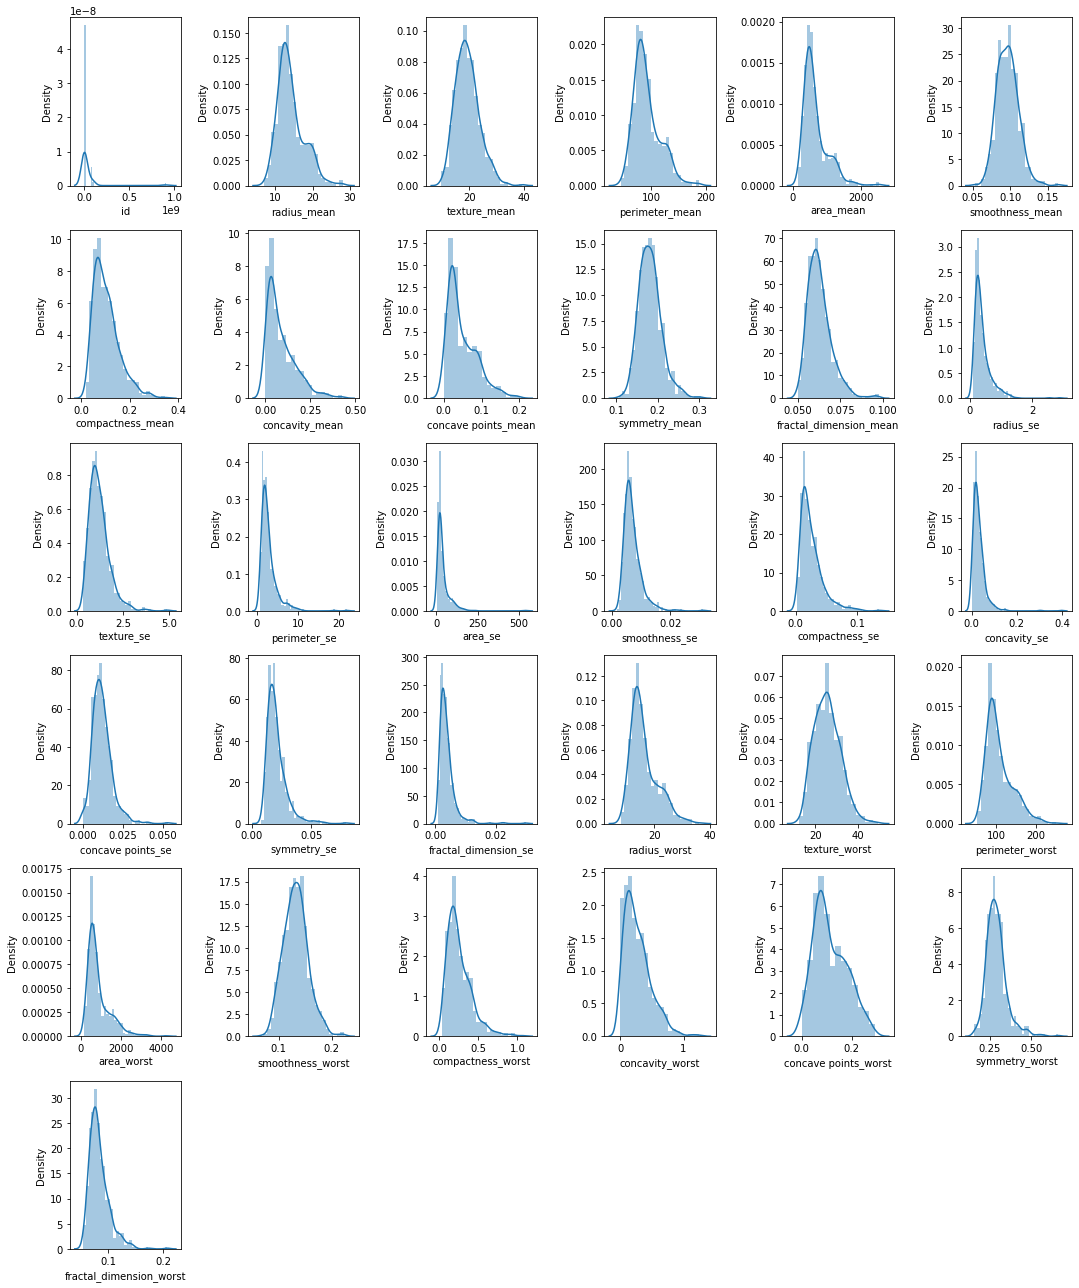

Verificando a presença de outliers


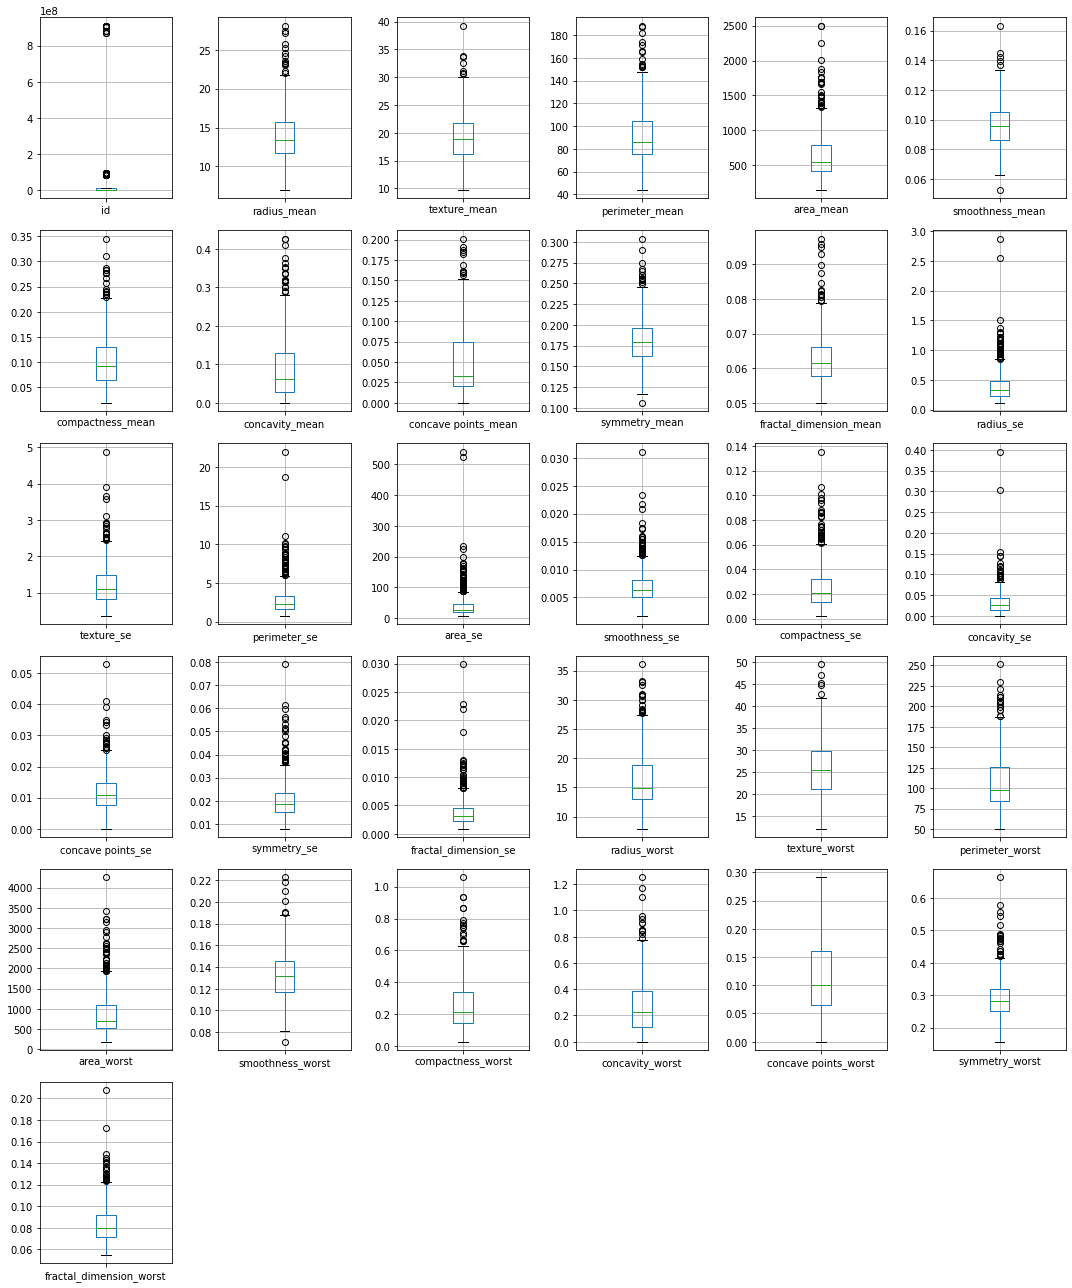

Wall time: 14.2 s


In [13]:
%%time
# Visualizando as features em distribuição e outliers

n=6
nf = [i for i in features if i not in cf]

print('Verificando a distribuição das Features')
plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df_breast[nf[c]])
plt.tight_layout()
plt.show()

print('Verificando a presença de outliers')
plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df_breast.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Comentários**

Embora estejam muito bem distribuídas, existem outliers que iremos tratar

## Preprocessamento

In [14]:
%%time
# Vamos inicialmente verificar a presença de dados nulos

nulos = pd.DataFrame(df_breast.isnull().sum().sort_values(), columns=['Total Null Values'])
nulos['Percentage'] = round(nulos['Total Null Values']/df_breast.shape[0],3)*100
print(nulos)

                         Total Null Values  Percentage
id                                       0         0.0
concave points_worst                     0         0.0
concavity_worst                          0         0.0
compactness_worst                        0         0.0
smoothness_worst                         0         0.0
area_worst                               0         0.0
perimeter_worst                          0         0.0
texture_worst                            0         0.0
radius_worst                             0         0.0
fractal_dimension_se                     0         0.0
symmetry_se                              0         0.0
concave points_se                        0         0.0
concavity_se                             0         0.0
compactness_se                           0         0.0
smoothness_se                            0         0.0
area_se                                  0         0.0
perimeter_se                             0         0.0
texture_se

In [15]:
# Agora vejamos se há linhas duplicadas

display(len(df_breast))

569

In [16]:
# Dropando duplicadas

df_breast = df_breast.drop_duplicates()

In [17]:
# Reecontando as linhas
display(len(df_breast))

569

#### Nossa variável target 'diagnosis' possui valores B e M que converteremos em 0 e 1 respectivamente

In [18]:
df_breast.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [19]:
df_breast['diagnosis'] = df_breast['diagnosis'].replace({'B': 0, 'M': 1})
df_breast.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [20]:
%%time
# Removendo os outliers pelos quartis muito altos ou muito baixos

print('Remoção de amostras outliers em andamento...')
df_clean = df_breast.copy()

for i in [i for i in df_clean.columns]:
    if df_clean[i].nunique()>=12:
        Q1 = df_clean[i].quantile(0.15)
        Q3 = df_clean[i].quantile(0.85)
        IQR = Q3 - Q1
        df_clean = df_clean[df_clean[i] <= (Q3+(1.5*IQR))]
        df_clean = df_clean[df_clean[i] >= (Q1-(1.5*IQR))]
df_clean = df_clean.reset_index(drop=True)
print('\n\033[1mObservação 1:\033[0m Antes da remoção dos outliers, o dataset tinha {} amostras.'.format(df_breast.shape[0]))
print('\033[1mObservação 2:\033[0m Após a remoção dos outliers, o dataset tem agora {} amostras.'.format(df_clean.shape[0]))

print('Outliers removidas')

Remoção de amostras outliers em andamento...

Observação 1: Antes da remoção dos outliers, o dataset tinha 569 amostras.
Observação 2: Após a remoção dos outliers, o dataset tem agora 428 amostras.
Outliers removidas
Wall time: 122 ms


In [21]:
%%time
out = len(df_breast) - len(df_clean)
print(f'Foram removidos {out} valores considerados outliers do nosso dataset')

Foram removidos 141 valores considerados outliers do nosso dataset
Wall time: 1 ms


#### Aqui é um bom momento para balancear as amostras

> O SMOTE (synthetic minority oversampling technique) é um dos métodos de superamostra mais usados para resolver o problema do desequilíbrio.

> Ele visa equilibrar a distribuição de classes aumentando aleatoriamente os exemplos de classe minoritária, replicando-os.

In [22]:
%%time
# Aplicando o SMOTE

df_balanced = df_clean.copy()

print('Distribuição das amostras no Target antes do SMOTE:')
print(df_balanced.diagnosis.value_counts())

xf = df_balanced.columns
X = df_balanced.drop(['diagnosis'], axis = 1)
Y = df_balanced['diagnosis']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df_balanced = pd.DataFrame(X, columns=xf)
df_balanced['diagnosis'] = Y

print('\nDistribuição das amostras no Target após a utilização da SMOTE:',)
print(Y.value_counts())

Distribuição das amostras no Target antes do SMOTE:
0    296
1    132
Name: diagnosis, dtype: int64

Distribuição das amostras no Target após a utilização da SMOTE:
1    296
0    296
Name: diagnosis, dtype: int64
Wall time: 452 ms


#### Tamanho do dataframe após o preprocessamento

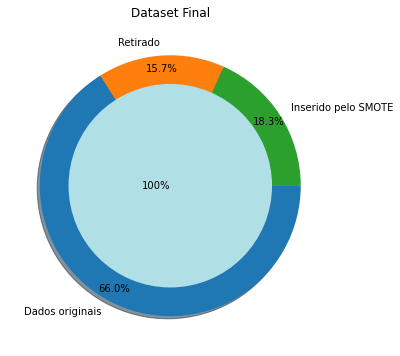


Inferência:O dataset final tratado tem 592 amostras e 32 colunas.
Wall time: 229 ms


In [23]:
%%time
df = df_balanced.copy()

plt.title('Dataset Final')

plt.pie([df.shape[0], df_breast.shape[0]-df_clean.shape[0], df_balanced.shape[0]-df_clean.shape[0]], radius = 1, shadow=True,
        labels=['Dados originais','Retirado','Inserido pelo SMOTE'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])

plt.show()

print('\n\033[1mInferência:\033[0mO dataset final tratado tem {} amostras e {} colunas.'.format(df.shape[0], df.shape[1]))

### Manipulação dos dados

In [24]:
%%time
# Dividindo o dataset em treino e teste mantendo uma cópia

df_ml = df.copy()

X = df_ml.drop([target],axis=1)
Y = df_ml[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

print('Dataset Original  ---> ',X.shape,Y.shape,'\nDataset de treino  ---> ',
      Train_X.shape,Train_Y.shape,'\nDataset de teste   ---> ', Test_X.shape,'', Test_Y.shape)

Dataset Original  --->  (592, 31) (592,) 
Dataset de treino  --->  (473, 31) (473,) 
Dataset de teste   --->  (119, 31)  (119,)
Wall time: 4 ms


In [25]:
%%time
df_ml.columns

Wall time: 0 ns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [26]:
%%time
# Vamos dropar a coluna 'id' pois não será necessária

df_ml = df_ml.drop(['id'],axis=1)

Wall time: 0 ns


In [27]:
%%time
# Dimensionamento de recursos com StandardScaler

std = StandardScaler()

print('\033[1mStandardScaler aplicado no Dataset de treino'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardScaler aplicado no Dataset de teste'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                          StandardScaler aplicado no Dataset de treino                          


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02
mean,3.814191e-17,-4.647445e-17,1.313021e-15,1.492816e-16,1.938783e-16,4.342310e-17,-1.530371e-16,-4.788277e-17,-1.079709e-17,-1.113744e-15,-4.792971e-16,1.370762e-16,-9.435722e-17,6.008818e-17,1.159514e-16,1.528024e-16,8.637676e-17,1.121959e-16,-2.525581e-16,-2.173502e-16,5.633267e-18,-8.168237e-17,1.436483e-16,-4.309449e-16,9.482666e-17,-7.515717e-16,1.211152e-16,-1.633647e-16,1.201764e-16,8.785549e-16,9.624084e-16
std,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00
min,-7.568848e-01,-2.433368e+00,-2.586223e+00,-2.393926e+00,-1.847006e+00,-3.516346e+00,-1.848022e+00,-1.430177e+00,-1.568240e+00,-2.851990e+00,-2.246279e+00,-1.503504e+00,-1.836473e+00,-1.584636e+00,-1.260904e+00,-1.711080e+00,-1.693964e+00,-1.787269e+00,-2.555279e+00,-1.654949e+00,-1.703473e+00,-2.114166e+00,-2.576751e+00,-2.104863e+00,-1.605459e+00,-2.406395e+00,-1.593145e+00,-1.616005e+00,-2.032738e+00,-2.429624e+00,-1.773402e+00
25%,-5.017138e-01,-7.543597e-01,-6.716655e-01,-7.825136e-01,-7.846757e-01,-7.264091e-01,-8.157982e-01,-8.709432e-01,-8.674590e-01,-7.470927e-01,-7.503826e-01,-7.884928e-01,-7.351496e-01,-7.869148e-01,-7.674956e-01,-6.905293e-01,-7.851452e-01,-7.134597e-01,-6.782560e-01,-6.950043e-01,-7.242276e-01,-8.316326e-01,-6.899724e-01,-8.378287e-01,-8.341773e-01,-6.934625e-01,-7.418882e-01,-8.231861e-01,-8.224545e-01,-7.127991e-01,-7.230765e-01
50%,-4.920236e-01,-1.305211e-01,1.641964e-02,-1.005439e-01,-2.098337e-01,2.329678e-02,-6.400366e-02,-1.319009e-01,-9.118415e-02,2.115033e-02,-7.558118e-02,-2.789083e-01,-1.639776e-01,-2.362764e-01,-3.658119e-01,-2.550886e-01,-1.433695e-01,-8.212757e-02,-3.497945e-02,-2.108997e-01,-1.472470e-01,-1.520988e-01,-3.213002e-02,-8.761092e-02,-2.582897e-01,3.433161e-02,-1.373291e-01,-9.032409e-02,4.759807e-03,-8.995110e-02,-2.134268e-01
75%,-4.837498e-01,7.960923e-01,6.303025e-01,7.635375e-01,7.518977e-01,6.697562e-01,6.732659e-01,7.056666e-01,8.440151e-01,6.384091e-01,5.943718e-01,6.425904e-01,5.939715e-01,6.954589e-01,5.858902e-01,5.081362e-01,5.863981e-01,6.581593e-01,7.028465e-01,4.182685e-01,5.455693e-01,7.732731e-01,7.684859e-01,7.378294e-01,6.920076e-01,7.288279e-01,6.156417e-01,6.366464e-01,8.364044e-01,5.548563e-01,5.435112e-01
max,1.967096e+00,2.705109e+00,2.931590e+00,2.907295e+00,3.257806e+00,3.222744e+00,4.160009e+00,4.021344e+00,3.199778e+00,3.236225e+00,3.119814e+00,3.659755e+00,3.953530e+00,3.556406e+00,3.294274e+00,3.822300e+00,3.758949e+00,3.813004e+00,3.670188e+00,4.024655e+00,4.160051e+00,2.542844e+00,2.770929e+00,2.535599e+00,3.054167e+00,2.674369e+00,3.588239e+00,3.429421e+00,2.695364e+00,3.375440e+00,3.272510e+00



                           StandardScaler aplicado no Dataset de teste                           


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,-0.077690,-0.209280,-0.068787,-0.211950,-0.217218,-0.070147,-0.168570,-0.187718,-0.219604,0.014856,0.005094,-0.172766,0.009399,-0.200216,-0.213624,0.031648,-0.120643,-0.157539,-0.145069,0.091462,-0.021029,-0.201377,-0.033279,-0.209329,-0.210025,-0.041207,-0.115755,-0.127246,-0.157422,0.078246,-0.054372
std,0.944991,0.919703,1.030683,0.918502,0.892787,0.977688,0.950704,0.942777,0.924541,1.020242,0.998142,0.865402,1.065837,0.866465,0.845962,1.132242,0.934158,0.927297,1.034682,1.096668,1.074145,0.924542,0.996178,0.919744,0.904214,0.978760,0.897002,0.967239,0.961930,1.007974,0.912138
min,-0.756812,-1.883570,-2.173897,-1.865232,-1.557761,-2.728111,-2.020684,-1.430177,-1.568240,-2.692124,-1.797060,-1.508281,-1.775245,-1.513224,-1.240607,-1.780663,-1.755316,-1.787269,-2.555279,-1.472608,-1.739541,-1.720361,-2.182769,-1.642144,-1.397039,-2.541489,-1.679500,-1.616005,-2.032738,-1.651064,-1.703512
25%,-0.501257,-0.892990,-0.775711,-0.920214,-0.886441,-0.732792,-0.840514,-0.920073,-0.958110,-0.618312,-0.828065,-0.850418,-0.697237,-0.892684,-0.832958,-0.733452,-0.809767,-0.849232,-0.882171,-0.717776,-0.870700,-0.922083,-0.792986,-0.927991,-0.897103,-0.798252,-0.732794,-0.854352,-0.898107,-0.667882,-0.757475
50%,-0.491281,-0.382577,-0.176605,-0.403033,-0.465315,-0.003268,-0.315148,-0.482234,-0.572254,0.025591,-0.107850,-0.298018,-0.200396,-0.354862,-0.504484,-0.207825,-0.339607,-0.280667,-0.135355,-0.104632,-0.076921,-0.439683,0.016666,-0.446218,-0.525118,0.010547,-0.283482,-0.230317,-0.312836,0.007868,-0.161980
75%,-0.485645,0.379643,0.560059,0.446360,0.277820,0.566041,0.536162,0.452571,0.529481,0.604321,0.693501,0.381428,0.619286,0.334949,0.162342,0.494132,0.539980,0.533769,0.454533,0.551456,0.543829,0.433130,0.577380,0.434002,0.323258,0.610484,0.538844,0.499449,0.618214,0.580127,0.500984
max,1.967108,1.807159,2.692598,1.751351,1.957196,2.935533,2.876171,2.450724,2.216742,4.146571,2.730994,3.053342,4.005880,3.379504,2.479360,4.071748,2.479891,2.307379,2.968866,4.324844,3.628776,2.245983,2.216101,2.130720,2.694894,2.526907,2.402401,2.562204,1.864730,3.583255,2.698886


Wall time: 248 ms


## Seleção | Extração de Features

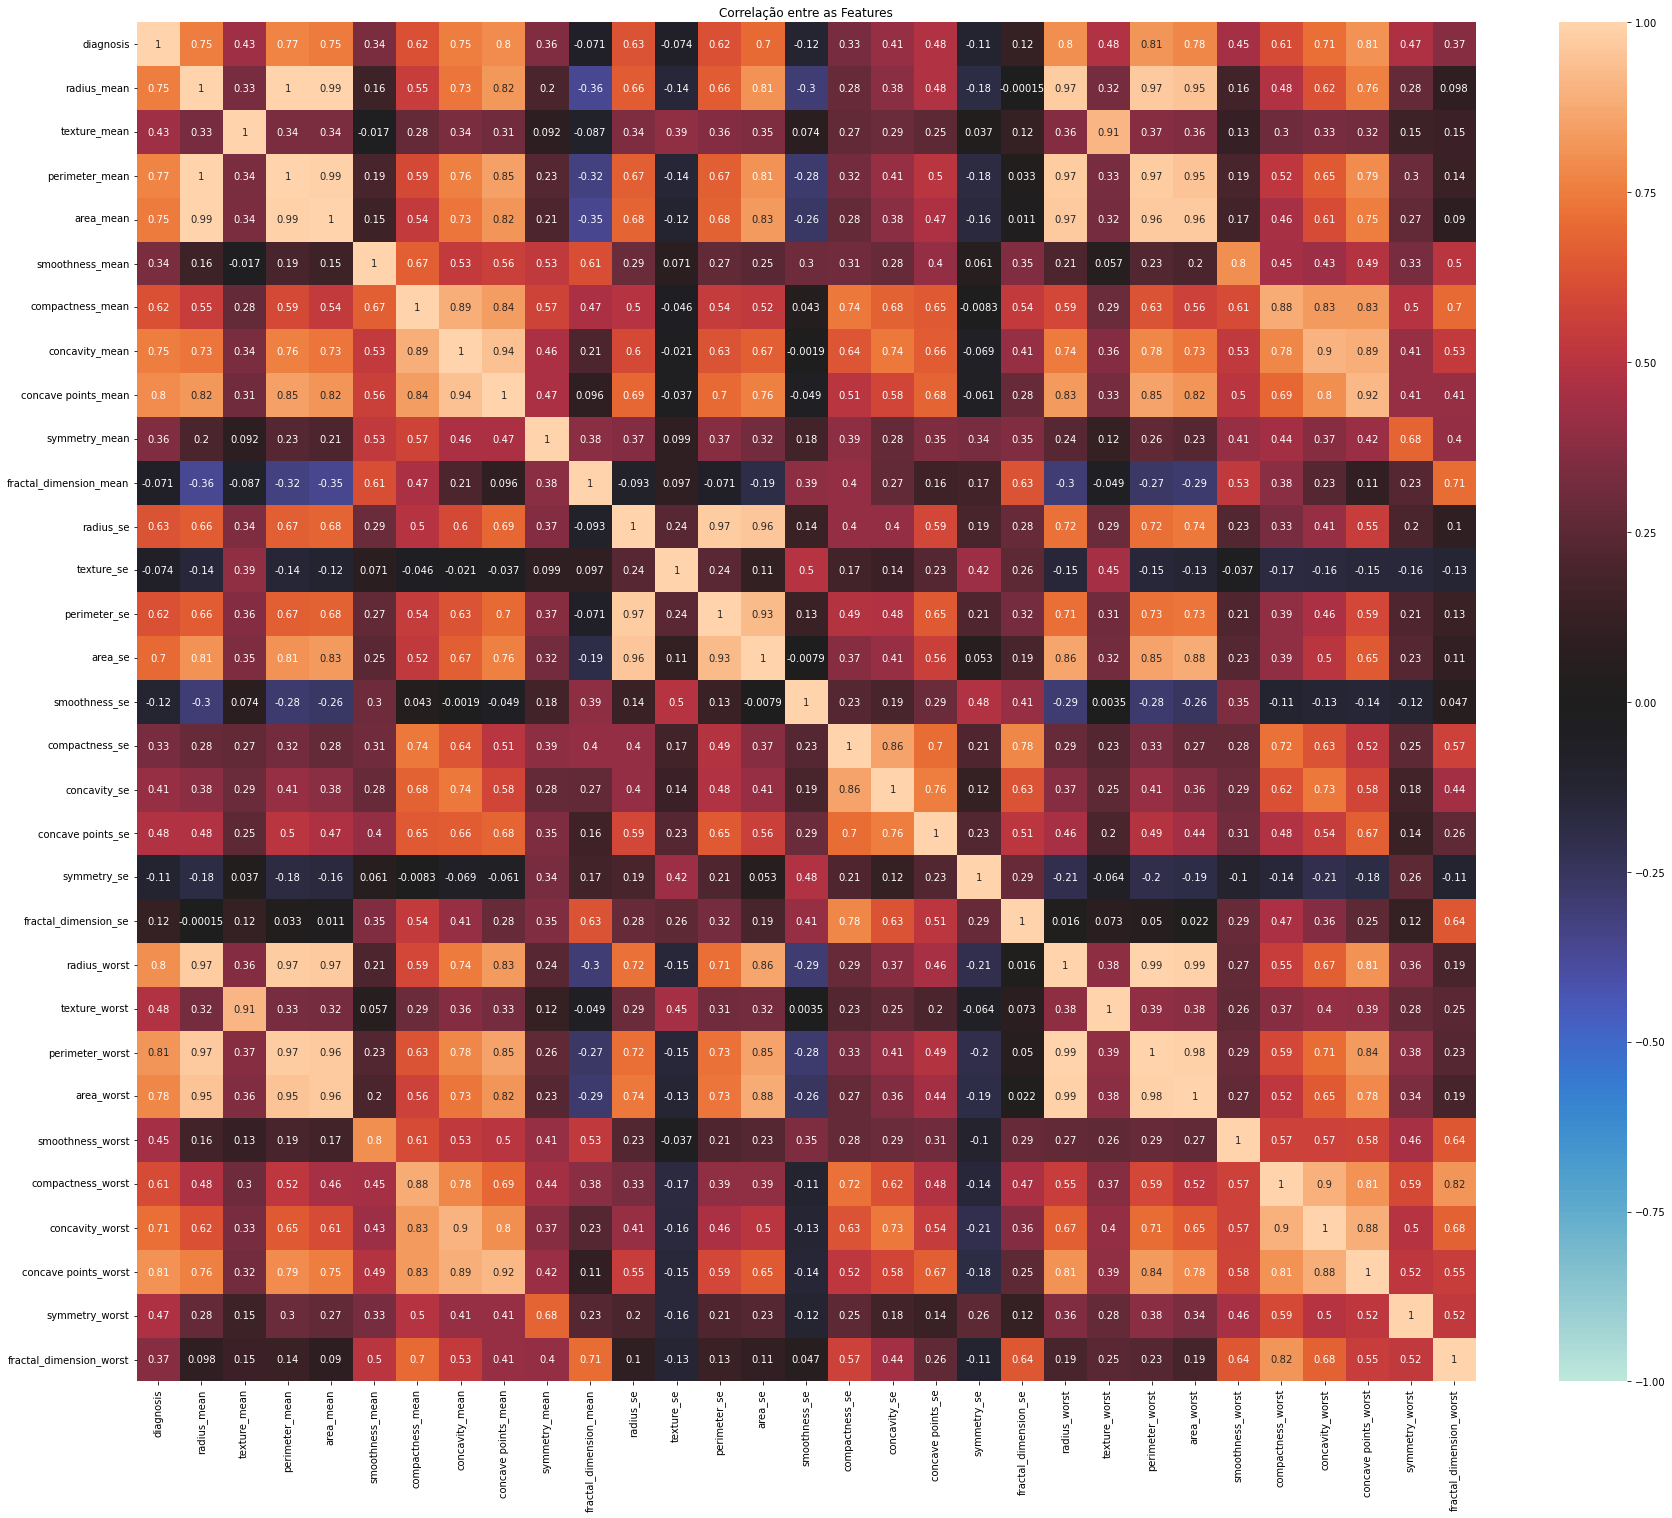

Wall time: 7 s


In [28]:
%%time
# Verificando a correlação entre as features

features = df_ml.columns
plt.figure(figsize=[30,25])
plt.title('Correlação entre as Features')
sns.heatmap(df_ml[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

**Observação**

A correlação entre as variáveis transmite muitas informações sobre a realidade entre elas. Há uma forte multicolinearidade no conjunto de dados. Isso significa que as variáveis independentes possuem relações lineares exatas ou aproximadamente exatas.

Usaremos diferentes técnicas para tentar melhorar o desempenho do modelo realizando etapas de Seleção/Extração de Recursos para cuidar dessas multicolinearidades.

Podemos aplicar:

> Automatic Method - Recursive Feature Elimination (RFE)
                         
> Decomposition Method - Principle Component Analysis (PCA)

### Aplicando primeiro o RFE

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:27<00:00,  1.12it/s]


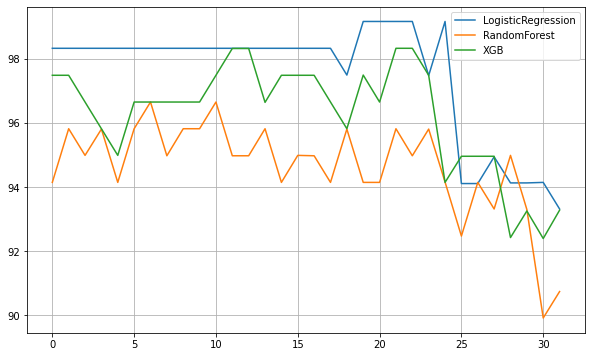

Wall time: 28.8 s


In [29]:
%%time
'''
Na eliminação de recursos recursivos, treinamos repetidamente um modelo várias vezes e cada vez que removemos
o recurso menos importante do modelo determinado por coef_ ou feature_importance_ atributo do modelo.
'''

# Rodando o RFE com o número de saídas de features igual a 10

LR = LogisticRegression()#.fit(Train_X_std, Train_Y)

# Aplicaremos Regressão Logística, RandomForest e XGB
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

for i in tqdm(range(len(X.columns.values))):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
plt.plot(scores1, label='LogisticRegression')
plt.plot(scores2, label='RandomForest')
plt.plot(scores3, label='XGB')
plt.legend()
plt.grid()
plt.show()

### Variância explicada

Conceito importante: leia as aspas triplas acima


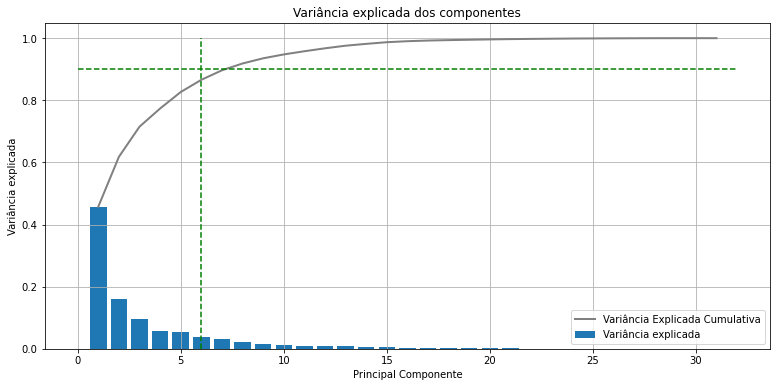

Wall time: 618 ms


In [30]:
%%time
pca = PCA().fit(Train_X_std)

print('Conceito importante: leia as aspas triplas acima')
'''
A variância explicada é usada para medir a discrepância entre um modelo e dados reais. 
Em outras palavras, é a parte da variância total do modelo que é explicada por fatores 
que estão realmente presentes e não é devido à variância de erros
'''

fig, ax = plt.subplots(figsize=(13,6))

x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Variância explicada')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Variância Explicada Cumulativa', color='gray')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([6,6],[0,1], 'g--')

ax.set_title('Variância explicada dos componentes')
ax.set_xlabel('Principal Componente')
ax.set_ylabel('Variância explicada')

plt.grid()
plt.legend()
plt.show()

**Evitaremos a realização da redução da dimensionalidade para o problema atual pois percentuais mais elevados de variância explicada indicam que podemos fazer melhores previsões e nesse caso, a variância explicada está cada vez menor**

  0%|                                                                                           | 0/31 [00:00<?, ?it/s]

Conjunto final de features de treinamento transformado:
(473, 31)

Conjunto final de features de teste transformado:
(119, 31)


  3%|██▋                                                                                | 1/31 [00:00<00:29,  1.02it/s]

Conjunto final de features de treinamento transformado:
(473, 30)

Conjunto final de features de teste transformado:
(119, 30)


  6%|█████▎                                                                             | 2/31 [00:02<00:29,  1.02s/it]

Conjunto final de features de treinamento transformado:
(473, 29)

Conjunto final de features de teste transformado:
(119, 29)


 10%|████████                                                                           | 3/31 [00:03<00:28,  1.02s/it]

Conjunto final de features de treinamento transformado:
(473, 28)

Conjunto final de features de teste transformado:
(119, 28)


 13%|██████████▋                                                                        | 4/31 [00:03<00:26,  1.03it/s]

Conjunto final de features de treinamento transformado:
(473, 27)

Conjunto final de features de teste transformado:
(119, 27)


 16%|█████████████▍                                                                     | 5/31 [00:04<00:24,  1.08it/s]

Conjunto final de features de treinamento transformado:
(473, 26)

Conjunto final de features de teste transformado:
(119, 26)


 19%|████████████████                                                                   | 6/31 [00:05<00:21,  1.14it/s]

Conjunto final de features de treinamento transformado:
(473, 25)

Conjunto final de features de teste transformado:
(119, 25)


 23%|██████████████████▋                                                                | 7/31 [00:06<00:20,  1.19it/s]

Conjunto final de features de treinamento transformado:
(473, 24)

Conjunto final de features de teste transformado:
(119, 24)


 26%|█████████████████████▍                                                             | 8/31 [00:07<00:19,  1.20it/s]

Conjunto final de features de treinamento transformado:
(473, 23)

Conjunto final de features de teste transformado:
(119, 23)


 29%|████████████████████████                                                           | 9/31 [00:07<00:18,  1.22it/s]

Conjunto final de features de treinamento transformado:
(473, 22)

Conjunto final de features de teste transformado:
(119, 22)


 32%|██████████████████████████▍                                                       | 10/31 [00:08<00:16,  1.24it/s]

Conjunto final de features de treinamento transformado:
(473, 21)

Conjunto final de features de teste transformado:
(119, 21)


 35%|█████████████████████████████                                                     | 11/31 [00:09<00:15,  1.27it/s]

Conjunto final de features de treinamento transformado:
(473, 20)

Conjunto final de features de teste transformado:
(119, 20)


 39%|███████████████████████████████▋                                                  | 12/31 [00:10<00:14,  1.30it/s]

Conjunto final de features de treinamento transformado:
(473, 19)

Conjunto final de features de teste transformado:
(119, 19)


 42%|██████████████████████████████████▍                                               | 13/31 [00:10<00:13,  1.30it/s]

Conjunto final de features de treinamento transformado:
(473, 18)

Conjunto final de features de teste transformado:
(119, 18)


 45%|█████████████████████████████████████                                             | 14/31 [00:11<00:12,  1.32it/s]

Conjunto final de features de treinamento transformado:
(473, 17)

Conjunto final de features de teste transformado:
(119, 17)


 48%|███████████████████████████████████████▋                                          | 15/31 [00:12<00:12,  1.33it/s]

Conjunto final de features de treinamento transformado:
(473, 16)

Conjunto final de features de teste transformado:
(119, 16)


 52%|██████████████████████████████████████████▎                                       | 16/31 [00:13<00:10,  1.37it/s]

Conjunto final de features de treinamento transformado:
(473, 15)

Conjunto final de features de teste transformado:
(119, 15)


 55%|████████████████████████████████████████████▉                                     | 17/31 [00:13<00:10,  1.36it/s]

Conjunto final de features de treinamento transformado:
(473, 14)

Conjunto final de features de teste transformado:
(119, 14)


 58%|███████████████████████████████████████████████▌                                  | 18/31 [00:14<00:09,  1.42it/s]

Conjunto final de features de treinamento transformado:
(473, 13)

Conjunto final de features de teste transformado:
(119, 13)


 61%|██████████████████████████████████████████████████▎                               | 19/31 [00:15<00:08,  1.35it/s]

Conjunto final de features de treinamento transformado:
(473, 12)

Conjunto final de features de teste transformado:
(119, 12)


 65%|████████████████████████████████████████████████████▉                             | 20/31 [00:16<00:08,  1.37it/s]

Conjunto final de features de treinamento transformado:
(473, 11)

Conjunto final de features de teste transformado:
(119, 11)


 68%|███████████████████████████████████████████████████████▌                          | 21/31 [00:16<00:07,  1.37it/s]

Conjunto final de features de treinamento transformado:
(473, 10)

Conjunto final de features de teste transformado:
(119, 10)


 71%|██████████████████████████████████████████████████████████▏                       | 22/31 [00:17<00:06,  1.42it/s]

Conjunto final de features de treinamento transformado:
(473, 9)

Conjunto final de features de teste transformado:
(119, 9)


 74%|████████████████████████████████████████████████████████████▊                     | 23/31 [00:17<00:05,  1.48it/s]

Conjunto final de features de treinamento transformado:
(473, 8)

Conjunto final de features de teste transformado:
(119, 8)


 77%|███████████████████████████████████████████████████████████████▍                  | 24/31 [00:18<00:04,  1.54it/s]

Conjunto final de features de treinamento transformado:
(473, 7)

Conjunto final de features de teste transformado:
(119, 7)


 81%|██████████████████████████████████████████████████████████████████▏               | 25/31 [00:19<00:04,  1.47it/s]

Conjunto final de features de treinamento transformado:
(473, 6)

Conjunto final de features de teste transformado:
(119, 6)


 84%|████████████████████████████████████████████████████████████████████▊             | 26/31 [00:20<00:03,  1.46it/s]

Conjunto final de features de treinamento transformado:
(473, 5)

Conjunto final de features de teste transformado:
(119, 5)


 87%|███████████████████████████████████████████████████████████████████████▍          | 27/31 [00:20<00:02,  1.53it/s]

Conjunto final de features de treinamento transformado:
(473, 4)

Conjunto final de features de teste transformado:
(119, 4)


 90%|██████████████████████████████████████████████████████████████████████████        | 28/31 [00:21<00:01,  1.51it/s]

Conjunto final de features de treinamento transformado:
(473, 3)

Conjunto final de features de teste transformado:
(119, 3)


 94%|████████████████████████████████████████████████████████████████████████████▋     | 29/31 [00:22<00:01,  1.44it/s]

Conjunto final de features de treinamento transformado:
(473, 2)

Conjunto final de features de teste transformado:
(119, 2)


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:22<00:00,  1.42it/s]

Conjunto final de features de treinamento transformado:
(473, 1)

Conjunto final de features de teste transformado:
(119, 1)


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:23<00:00,  1.32it/s]


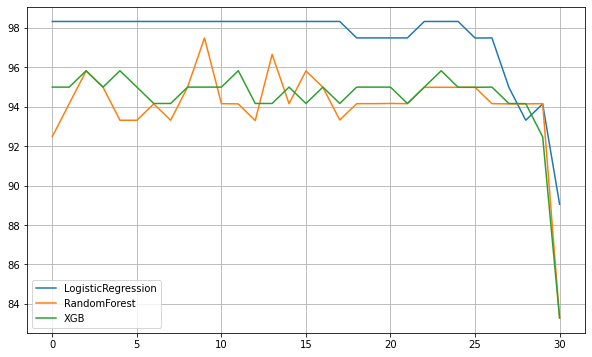

Wall time: 23.9 s


In [31]:
%%time
# Aplicando as transormações PCA

scores1=[]; scores2=[]; scores3=[]

for i in tqdm(range(len(X.columns.values))):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    print('Conjunto final de features de treinamento transformado:')
    print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    print('\nConjunto final de features de teste transformado:')
    print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)
    
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std_pca, Train_Y, eval_metric='logloss').predict(Test_X_std_pca),average='weighted')*100)

    
plt.plot(scores1, label='LogisticRegression')
plt.plot(scores2, label='RandomForest')
plt.plot(scores3, label='XGB')

plt.legend()
plt.grid()
plt.show()

### Percebam que com aproximadamente 17 features temos na média das três técnicas o melhor resultado:



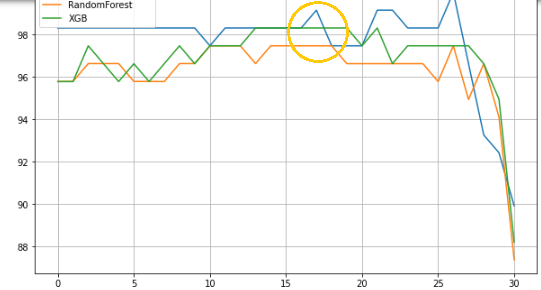

In [32]:
%%time
#### Finalizando os recursos listados

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-13)   
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

98.32447264620134
94.97341793860402
97.48304673920457
(473, 18)
(119, 18)
Wall time: 1.13 s


## Modelagem Preditiva

In [33]:
%%time
# Vamos criar primeiro criar uma tabela para armazenar os resultados de vários modelos e vamos preenche-la com zeros

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)',
                          'Logistic Regression (LR)','Decision Tree Classifier (DT)',
                          'Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)']
Evaluation_Results

Wall time: 1 ms


,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0


In [34]:
%%time
# Vamos definir funções para resumir as pontuações da Predição

# Função que resume a classificação
def Classification(pred,pred_prob,i, Evaluation_Results=Evaluation_Results):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('Avaliando o modelo...\n')
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusion Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mRelatório de Classificação:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

# Visualizando a função
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

Wall time: 0 ns


### Gradiente Boosting

Avaliando o modelo...

Accuracy = 94.1%
F1 Score = 94.1%

 Confusion Matrix:
 [[67  4]
 [ 3 45]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.92      0.94      0.93        48

    accuracy                           0.94       119
   macro avg       0.94      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



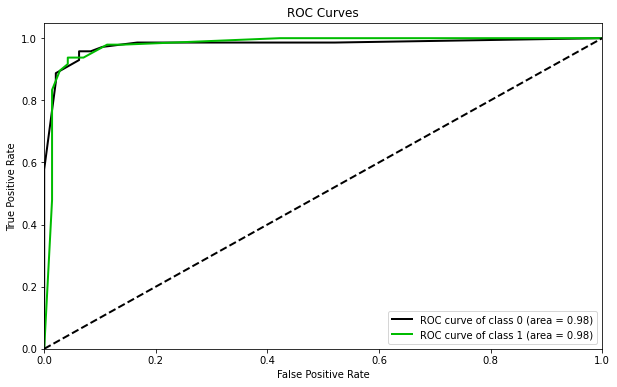

Wall time: 52.9 s


In [35]:
%%time
GB_model = GradientBoostingClassifier()
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification(pred,pred_prob,0)

### XBG

Avaliando o modelo...

Accuracy = 97.5%
F1 Score = 97.5%

 Confusion Matrix:
 [[69  2]
 [ 1 47]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.96      0.98      0.97        48

    accuracy                           0.97       119
   macro avg       0.97      0.98      0.97       119
weighted avg       0.98      0.97      0.97       119



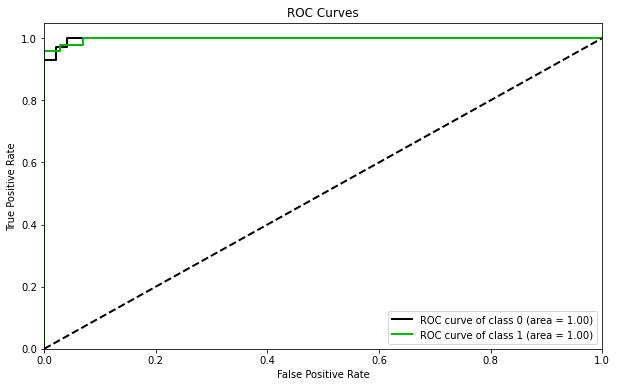

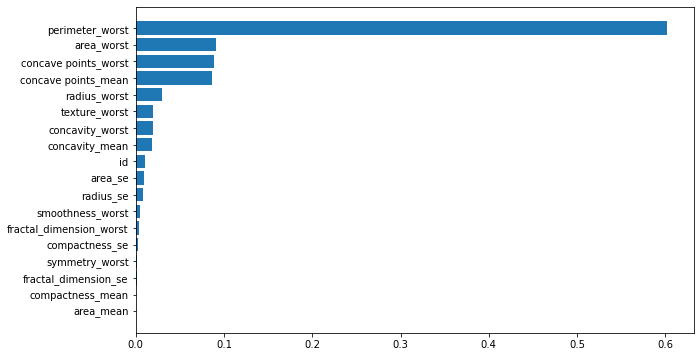

Wall time: 1.05 s


In [36]:
%%time
XGB_model = XGBClassifier()

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification(pred,pred_prob,1)

xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.barh(xgbf.index,xgbf.values[:,0])
plt.show()

### Regressão Logística

Avaliando o modelo...

Accuracy = 52.1%
F1 Score = 45.0%

 Confusion Matrix:
 [[14 57]
 [ 0 48]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33        71
           1       0.46      1.00      0.63        48

    accuracy                           0.52       119
   macro avg       0.73      0.60      0.48       119
weighted avg       0.78      0.52      0.45       119



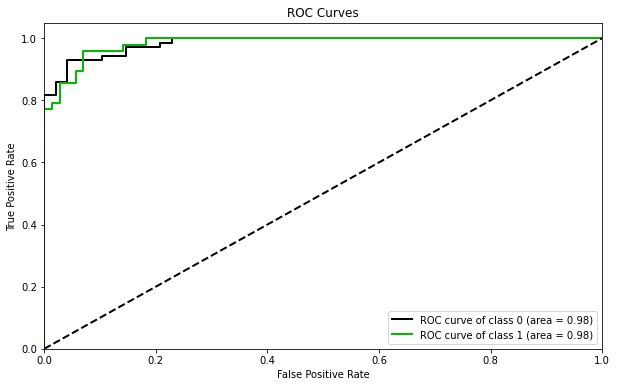


Interpretando a Saída da Regressão Logística:

intercept  0.09750853951987588
classes [0 1]


,coeff
id,-0.000225
area_mean,0.007343
compactness_mean,0.006256
concavity_mean,0.007471
concave points_mean,0.007926
radius_se,0.006213
area_se,0.006858
compactness_se,0.003313
fractal_dimension_se,0.001429
radius_worst,0.007959


Wall time: 2.5 s


In [37]:
%%time
LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] 
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification(pred,pred_prob,2)

print('\n\033[1mInterpretando a Saída da Regressão Logística:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

### Decision Tree Classifier

Avaliando o modelo...

Accuracy = 93.30000000000001%
F1 Score = 93.2%

 Confusion Matrix:
 [[69  2]
 [ 6 42]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        71
           1       0.95      0.88      0.91        48

    accuracy                           0.93       119
   macro avg       0.94      0.92      0.93       119
weighted avg       0.93      0.93      0.93       119



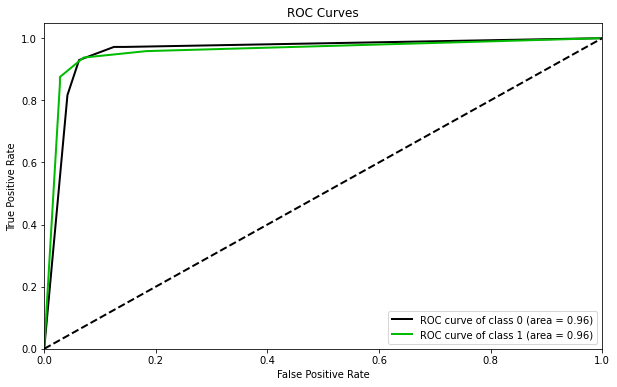


Interpretando a saída do DT:



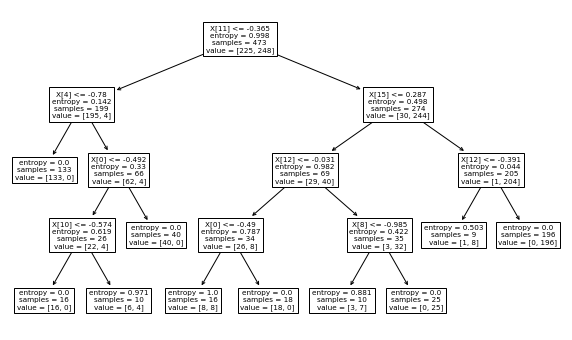

Wall time: 3.46 s


In [38]:
%%time
DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification(pred,pred_prob,3)

print('\n\033[1mInterpretando a saída do DT:\n\033[0m')
tree.plot_tree(DT)
plt.show()

### Random Forest

Avaliando o modelo...

Accuracy = 95.0%
F1 Score = 95.0%

 Confusion Matrix:
 [[67  4]
 [ 2 46]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.92      0.96      0.94        48

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



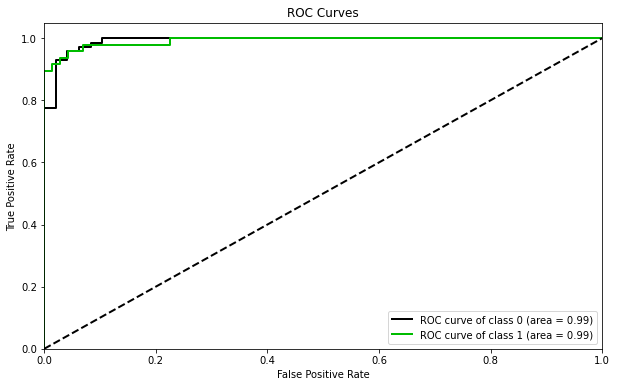


Interpretando a saída do Random Forest:



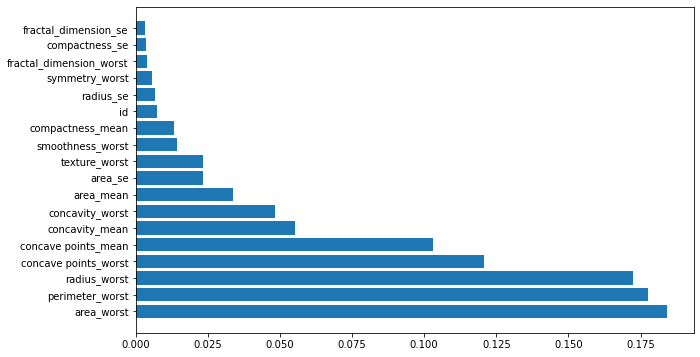

Wall time: 31 s


In [39]:
%%time
RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification(pred,pred_prob,4)

print('\n\033[1mInterpretando a saída do Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

### Naive Bayes

Avaliando o modelo...

Accuracy = 90.8%
F1 Score = 90.7%

 Confusion Matrix:
 [[66  5]
 [ 6 42]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        71
           1       0.89      0.88      0.88        48

    accuracy                           0.91       119
   macro avg       0.91      0.90      0.90       119
weighted avg       0.91      0.91      0.91       119



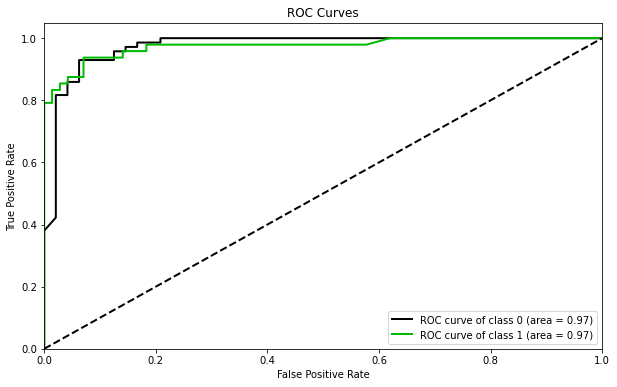

Wall time: 579 ms


In [40]:
%%time
NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification(pred,pred_prob,5)

### Support Vector Machine

Avaliando o modelo...

Accuracy = 82.39999999999999%
F1 Score = 82.39999999999999%

 Confusion Matrix:
 [[50 21]
 [ 0 48]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.70      0.83        71
           1       0.70      1.00      0.82        48

    accuracy                           0.82       119
   macro avg       0.85      0.85      0.82       119
weighted avg       0.88      0.82      0.82       119



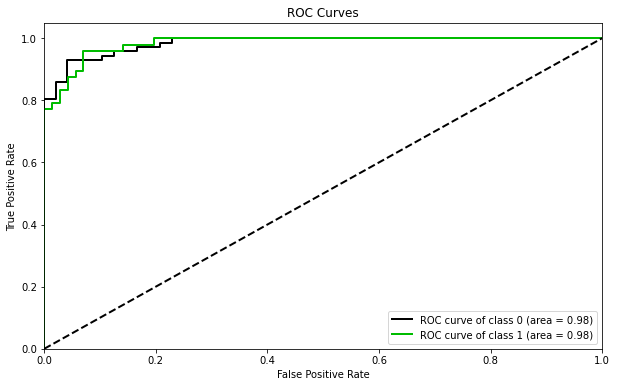

Wall time: 20.6 s


In [41]:
%%time
SVM_model = SVC(probability=True)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification(pred,pred_prob,6)

### KNN

Avaliando o modelo...

Accuracy = 95.8%
F1 Score = 95.8%

 Confusion Matrix:
 [[66  5]
 [ 0 48]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        71
           1       0.91      1.00      0.95        48

    accuracy                           0.96       119
   macro avg       0.95      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119



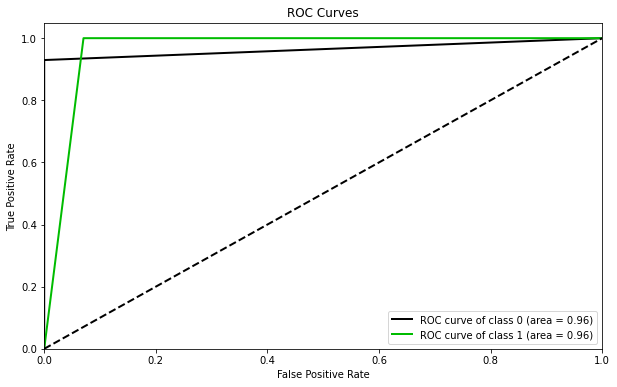

Wall time: 5.37 s


In [42]:
%%time
KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='recall', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification(pred,pred_prob,7)

Caso você não esteja familiarizado com os gráficos acima e veja muita informação, vamos simplificar.

Vamos aplicar uma matriz de confusão para visualizar melhor as coisas.

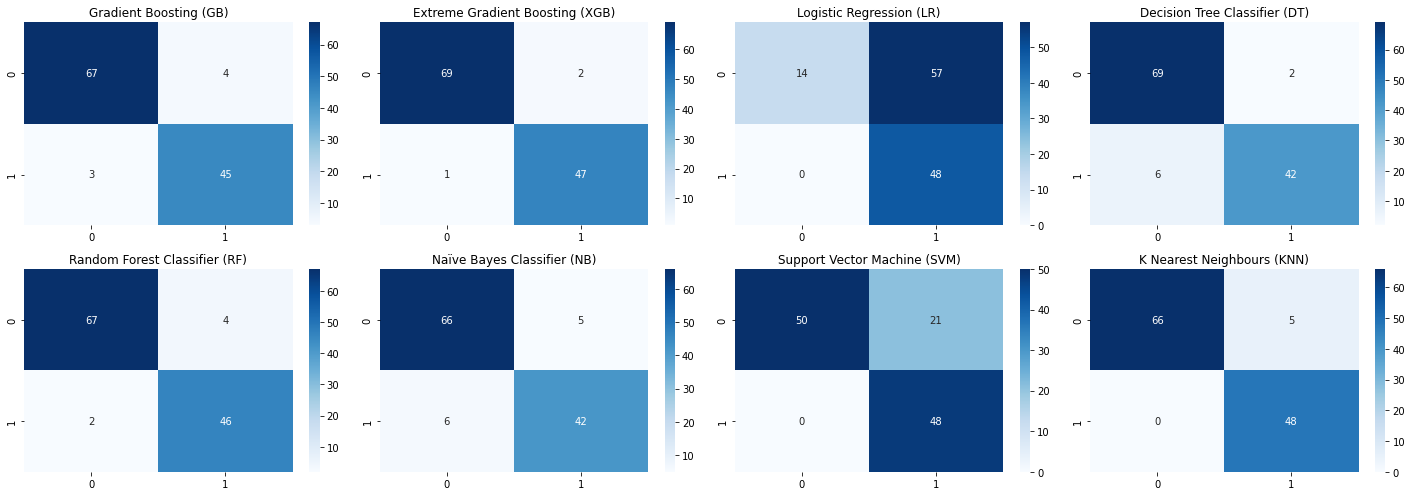

Wall time: 5.73 s


In [43]:
%%time
# Plotando a matriz de confusão de todos os modelos

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Atual'
    cm.columns.name = 'Previsto'
    sns.heatmap(cm, annot=annot, fmt='')
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f')
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([GB,XGB,LR,DT,RF,NB,SVM,KNN])

### Simplificando ainda mais...

In [44]:
display(Evaluation_Results)

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Gradient Boosting (GB),94.1,94.2,94.1,94.1,97.9
Extreme Gradient Boosting (XGB),97.5,97.5,97.5,97.5,99.8
Logistic Regression (LR),52.1,78.1,52.1,45.0,98.4
Decision Tree Classifier (DT),93.3,93.4,93.3,93.2,95.7
Random Forest Classifier (RF),95.0,95.0,95.0,95.0,99.2
Naïve Bayes Classifier (NB),90.8,90.7,90.8,90.7,97.4
Support Vector Machine (SVM),82.4,87.7,82.4,82.4,98.4
K Nearest Neighbours (KNN),95.8,96.2,95.8,95.8,96.5


                                     Comparação dos modelos                                     


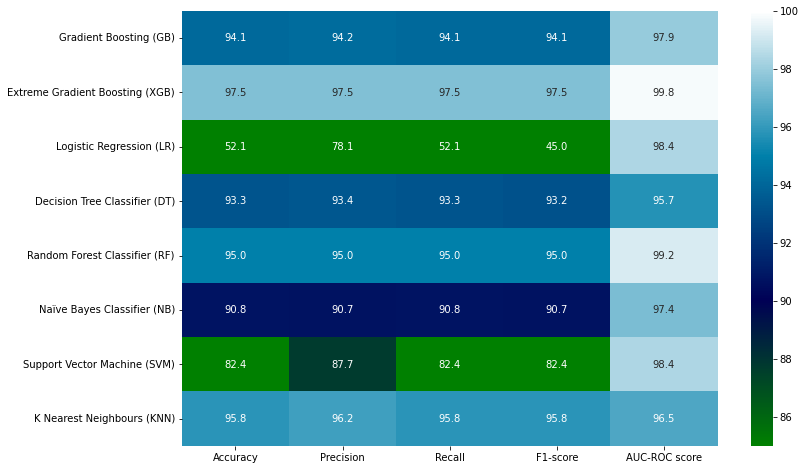

Wall time: 1.59 s


In [45]:
%%time
# Vejamos apenas os scores dos modelos agora

print('\033[1mComparação dos modelos'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='ocean', fmt='.1f')
plt.show()

In [46]:
# Verificando se estou utilizando a base correta. Faremos um value_counts com normalize. Base devidamente balanceada.

df_ml.diagnosis.value_counts(normalize=True)

1    0.5
0    0.5
Name: diagnosis, dtype: float64

In [47]:
# Verificando as features

df_ml.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### A arquitetura básica da rede neural que estaremos seguindo consiste em três componentes principais.

> 1.Camada de entrada: É aqui que as observações de treinamento são alimentadas. O número de variáveis preditoras também é especificado aqui através dos neurônios.

> 2.Camadas ocultas: Estas são as camadas intermediárias entre as camadas de entrada e saída. A rede neural profunda aprende sobre as relações envolvidas em dados neste componente.

> 3.Camada de saída: Esta é a camada onde a saída final é extraída do que está acontecendo nas duas camadas anteriores. Em caso de problemas de regressão, a camada de saída terá um neurônio.

#### Importando as bibliotecas para as redes neurais

In [48]:
%%time
import keras

# Importando o módulo sequential
from keras.models import Sequential

# Importando módulo denso para camadas ocultas
from keras.layers import Dense

# Importando funções de ativação
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Wall time: 0 ns


#### Criando as camadas

#### Após importar as bibliotecas vamos criar três tipos de camadas: entrada, oculta e saída.

#### O primeiro passo antes disso é criar o modelo

In [49]:
# Criando o modelo
classifier = Sequential()

#### Criando as camadas da rede neural

In [50]:
%%time
'''
Um modelo sequencial é indicado para uma pilha simples de camadas onde cada uma delas tem exatamente um tensor de entrada
e um tensor de saída.
Referência para os comandos abaixo:
https://keras.io/api/layers/core_layers/dense
'''

'''
No código abaixo, o Dense é aplicado para criar as camadas em que usamos parâmetros fundamentais.
O primeiro parâmetro é o nó de saída.
O segundo inicializa a matriz de pesos do kernel.
O terceiro é a função de ativação e o último é o nó de entrada ou o número de recursos independentes.
'''

# Criando a camada de entrada que especifica a função de ativação e o número de dimensões de entrada,
# que no nosso caso são 18 preditores.
classifier.add(Dense(units = 9, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 18))

# # Repete-se o mesmo processo mas desta vez sem o parâmetro input_dim.
classifier.add(Dense(units = 9, kernel_initializer = 'he_uniform', activation = 'relu'))

# Cria a camada de saída com um nó porque há uma classe de saída
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

Wall time: 103 ms


In [51]:
%%time
# Verificando as camadas

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
Wall time: 27 ms


#### Compilando nosso modelo com o otimizador

In [52]:
%%time
# Compilando a rede neural
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

'''
Ao definir nosso compilador, usaremos a "entropia cruzada categórica" como nossa medida de perda, 'adam'
como algoritmo otimizador e 'acurácia' como métrica de avaliação. 
A principal vantagem do otimizador "adam"
é que não precisamos especificar a taxa de aprendizagem, como é o caso da descida gradiente. O uso de "adam"
nos poupará, assim, da tarefa de otimizar a taxa de aprendizado para o nosso modelo.
'''

Wall time: 22 ms


#### Compilado o modelo, vamos aplicar a rede neural nos dados de treinamento

In [53]:
%%time
'''
O método fit ajusta a rede neural aos dados de treino seguindo os parâmetros especificados.
'''
model = classifier.fit(Train_X_std, Train_Y, batch_size = 100, epochs = 100)

Epoch 1/100
5/5 [==============================] - 2s 4ms/step - loss: 0.8558 - accuracy: 0.4799
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8062 - accuracy: 0.4820
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7620 - accuracy: 0.4820
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7215 - accuracy: 0.4841
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.4947
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.5053
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.5264
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.5497
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.5729
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.5835
Epoch 11/100
5/5 [===========

In [54]:
'''
Chegamos a uma acurácia muito elevada, mostrando que nosso modelo se ajustou muito bem aos dados.
'''

# Agora vamos aplicar a rede neural a base de teste.

y_pred = classifier.predict(Test_X_std)

In [55]:
y_pred_rn = (y_pred > 0.5)

In [56]:
# Construção tabela
Evaluation_Results_MLP = pd.DataFrame(np.zeros((1,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])

In [57]:
def Classification_Extra(pred,pred_prob,nome_modelo, Evaluation_Results=Evaluation_Results_MLP):
    Evaluation_Results.loc[nome_modelo] = [0,0,0,0,0]
    Evaluation_Results.loc[nome_modelo]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.loc[nome_modelo]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.loc[nome_modelo]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.loc[nome_modelo]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    if type(pred_prob) != int:
        Evaluation_Results.loc[nome_modelo]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('Avaliando o modelo...\n')
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusion Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mRelatório de Classificação:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

In [58]:
len(Test_Y)

119

In [59]:
len(y_pred_rn)

119

#### Matriz de confusão e o Score

In [60]:
cm = confusion_matrix(Test_Y, y_pred_rn)
score = accuracy_score(Test_Y, y_pred_rn)
print(cm)
print('Score:', score)

[[71  0]
 [ 1 47]]
Score: 0.9915966386554622


#### Heatmap da Matriz de Confusão

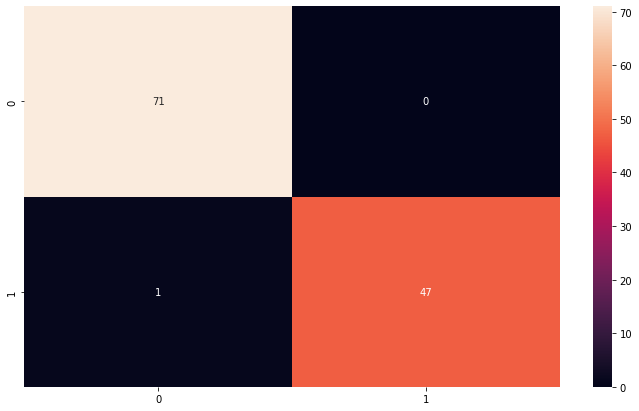

In [61]:
# Definindo o tamanho do print
plt.figure(figsize=[12,7])

sns.heatmap(cm, annot=True)
plt.show()

#### Visualizando a perda e a precisão em cada época

dict_keys(['loss', 'accuracy'])


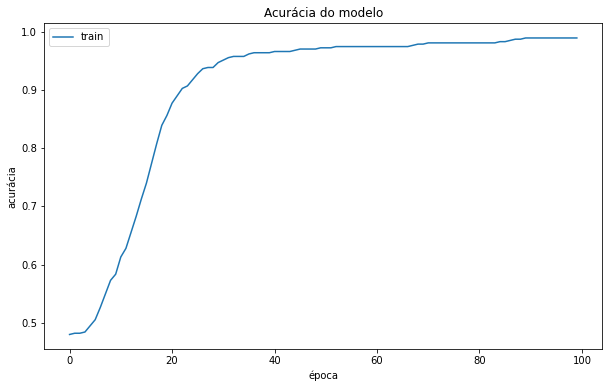

In [62]:
# Listando o histórico dos dados
print(model.history.keys())

# Resumo histórico da precisão
plt.plot(model.history['accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

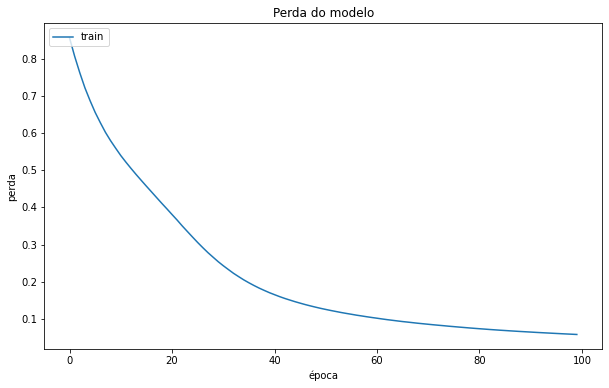

In [63]:
# Resumo histórico da perda
plt.plot(model.history['loss'])
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

### Aplicando o Perceptron

In [64]:
pptron = Perceptron()

In [65]:
%%time
score_treino_pptron = cross_val_score(pptron,
                         Train_X_std,
                         Train_Y,
                         scoring = 'recall',
                         cv = cv,
                         n_jobs = -1)

Wall time: 198 ms


In [66]:
%%time
score_test_pptron = cross_val_score(pptron,
                         Test_X_std,
                         Test_Y,
                         scoring = 'recall',
                         cv = cv,
                         n_jobs = -1)

Wall time: 197 ms


In [67]:
print('Recall Médio Treino: %.3f' % (np.mean(score_treino_pptron)))
print('Desvio Padrão Médio Treino: %.3f' % (np.std(score_treino_pptron)))

Recall Médio Treino: 0.968
Desvio Padrão Médio Treino: 0.033


In [68]:
print('Recall Médio Teste: %.3f' % (np.mean(score_test_pptron)))
print('Desvio Padrão Médio Teste: %.3f' % (np.std(score_test_pptron)))

Recall Médio Teste: 0.978
Desvio Padrão Médio Teste: 0.065


Text(0.5, 1.0, 'Região de Separação - Perceptron')

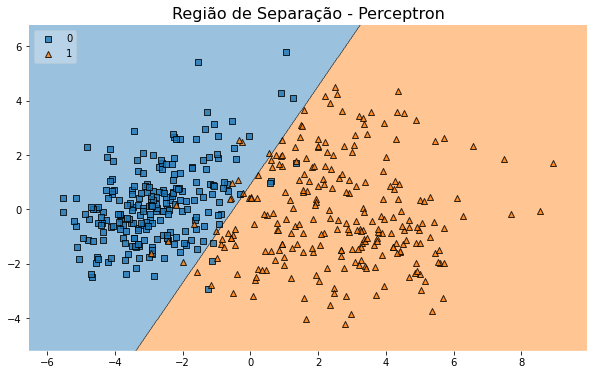

In [69]:
X = np.array(Train_X_std)
y = np.array(Train_Y)
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = Perceptron()
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X)
clf.fit(X_train2, y)
plot_decision_regions(X_train2, y, clf=clf, legend=2)

#plt.xlabel(X.columns[0], size=14)
#plt.ylabel(X.columns[1], size=14)
plt.title('Região de Separação - Perceptron', size=16)
## O perceptron consegue sim separar as classes

### Aplicando MLP

In [70]:
%%time

from sklearn.neural_network import MLPClassifier

Wall time: 11 ms


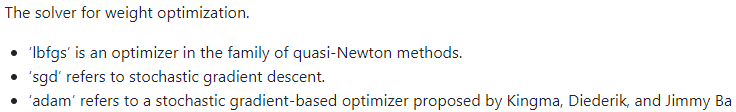

In [71]:
%%time

mlp_lbfgs = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 5, solver = 'lbfgs',
                    max_iter = 1000).fit(Train_X_std, Train_Y)

print('Score:', mlp_lbfgs.score(Train_X_std, Train_Y))

Score: 0.9894291754756871
Wall time: 2.65 s


Avaliando o modelo...

Accuracy = 98.3%
F1 Score = 98.3%

 Confusion Matrix:
 [[69  2]
 [ 0 48]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.96      1.00      0.98        48

    accuracy                           0.98       119
   macro avg       0.98      0.99      0.98       119
weighted avg       0.98      0.98      0.98       119



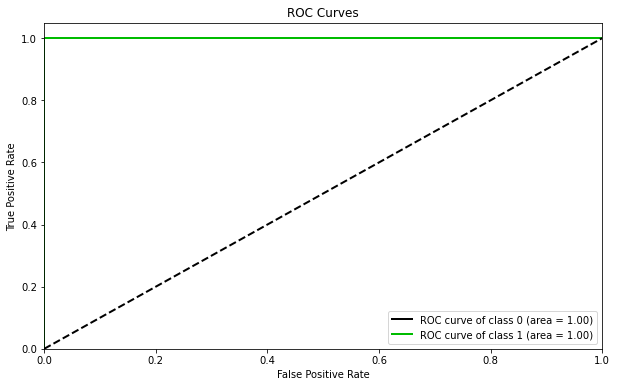

In [72]:
mlp_lbfgs_pred = mlp_lbfgs.predict(Test_X_std)
mlp_lbfgs_pred_proba = mlp_lbfgs.predict_proba(Test_X_std)
Classification_Extra(mlp_lbfgs_pred,mlp_lbfgs_pred_proba,'MLP_LBFGS')

In [73]:
%%time

mlp_sgd = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 5, solver = 'sgd',
                    max_iter = 1000).fit(Train_X_std, Train_Y)

print('Score:', mlp_sgd.score(Train_X_std, Train_Y))

Score: 0.9873150105708245
Wall time: 7.67 s


Avaliando o modelo...

Accuracy = 96.6%
F1 Score = 96.6%

 Confusion Matrix:
 [[68  3]
 [ 1 47]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.94      0.98      0.96        48

    accuracy                           0.97       119
   macro avg       0.96      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



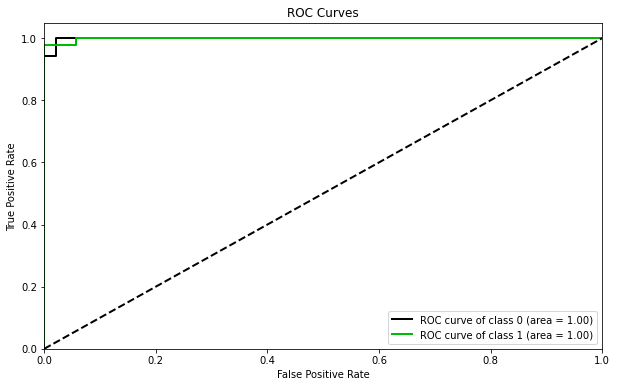

In [74]:
mlp_sgd_pred = mlp_sgd.predict(Test_X_std)
mlp_sgd_pred_proba = mlp_sgd.predict_proba(Test_X_std)
Classification_Extra(mlp_sgd_pred,mlp_sgd_pred_proba,'MLP_SGD')

In [75]:
%%time

mlp_adam = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 5, solver = 'adam',
                    max_iter = 1000).fit(Train_X_std, Train_Y)

print('Training score:', mlp_adam.score(Train_X_std, Train_Y))

Training score: 0.9873150105708245
Wall time: 1.82 s


Avaliando o modelo...

Accuracy = 96.6%
F1 Score = 96.6%

 Confusion Matrix:
 [[68  3]
 [ 1 47]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.94      0.98      0.96        48

    accuracy                           0.97       119
   macro avg       0.96      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



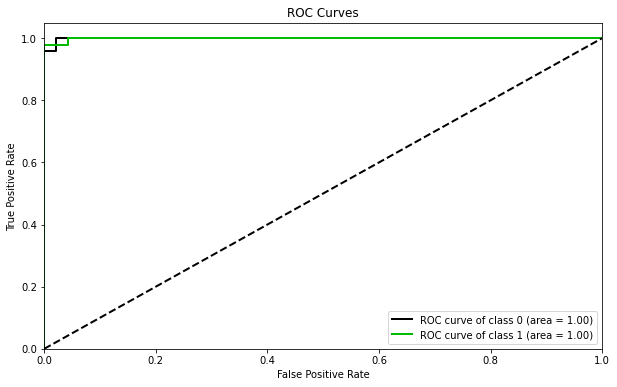

In [76]:
mlp_adam_pred = mlp_adam.predict(Test_X_std)
mlp_adam_pred_proba = mlp_adam.predict_proba(Test_X_std)
Classification_Extra(mlp_adam_pred,mlp_adam_pred_proba,'MLP_ADAM')

### Resultados

In [77]:
Evaluation_Results_MLP.drop(index=0,inplace=True)

In [78]:
evaluation_final = pd.concat([Evaluation_Results, Evaluation_Results_MLP], ignore_index=False, axis=0)
evaluation_final

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Gradient Boosting (GB),94.1,94.2,94.1,94.1,97.9
Extreme Gradient Boosting (XGB),97.5,97.5,97.5,97.5,99.8
Logistic Regression (LR),52.1,78.1,52.1,45.0,98.4
Decision Tree Classifier (DT),93.3,93.4,93.3,93.2,95.7
Random Forest Classifier (RF),95.0,95.0,95.0,95.0,99.2
Naïve Bayes Classifier (NB),90.8,90.7,90.8,90.7,97.4
Support Vector Machine (SVM),82.4,87.7,82.4,82.4,98.4
K Nearest Neighbours (KNN),95.8,96.2,95.8,95.8,96.5
MLP_LBFGS,98.3,98.4,98.3,98.3,100.0
MLP_SGD,96.6,96.7,96.6,96.6,99.9


### Melhor resultado
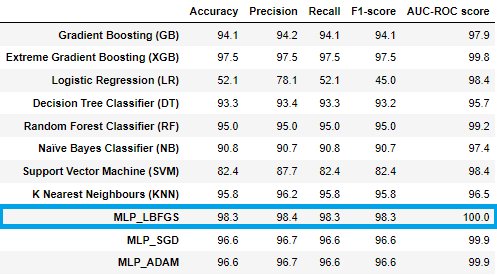